In [3]:
#THIS IS A TEST FOR STATIC CASE -- NOT INDICATIVE OF MOBILE CASES

import os
import pandas as pd
import csv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [63]:
numCH = [None]*200
with open("Log-clusters.txt") as csv_file:
    data = list(csv.reader(csv_file, delimiter=','))
    count = 0
    for row in data:
        numCH[count] = len(row)
        count = count+1
        for i in range(0,len(row)):
            row[i] = int(row[i])

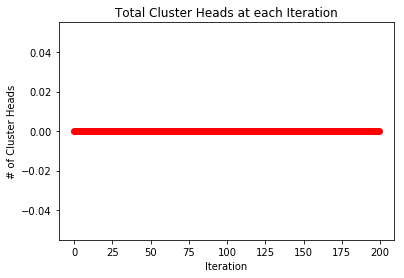

In [66]:
t = range(200)
plt.plot(t, numCH, 'ro')
plt.title("Total Cluster Heads at each Iteration")
plt.xlabel("Iteration")
plt.ylabel("# of Cluster Heads")
plt.show()

In [67]:
plt.figure()

def update_hist(num):
    plt.cla()
    plt.hist(data[num])
    plt.xlabel("Cluster Size")
    plt.ylabel("Frequency")
    plt.title("Cluster Sizes at T="+str(num))
    
fig = plt.figure()
hist = plt.hist(data[0])

In [68]:
num =0
animation = animation.FuncAnimation(fig, update_hist, 200, fargs=(num) )
HTML(animation.to_html5_video())

In [69]:
count = 0
total_nodes = 2000
print("Iteration\t\t    ClusterSize Freq\t\t\tNodes in Cluster\tCluster Heads\t  No Cluster")
#print("\t         \t    0   1   2   3   4   5   6   7   8")
for row in data:
    
    cluster_nodes = 0
    cluster_heads = 0
    count_array = np.bincount(row) 
    for i in range(0,len(count_array)):
        cluster_heads = cluster_heads + count_array[i]
        cluster_nodes = cluster_nodes + count_array[i]*(i+1)
    
    print("  ",count,"\t\t",np.bincount(row),"\t\t    ",cluster_nodes-cluster_heads,"\t\t  ",cluster_heads,"\t\t   ",total_nodes-cluster_nodes)
    count = count+1

Iteration		    ClusterSize Freq			Nodes in Cluster	Cluster Heads	  No Cluster
   0 		 [] 		     0 		   0 		    2000
   1 		 [] 		     0 		   0 		    2000
   2 		 [] 		     0 		   0 		    2000
   3 		 [] 		     0 		   0 		    2000
   4 		 [] 		     0 		   0 		    2000
   5 		 [] 		     0 		   0 		    2000
   6 		 [] 		     0 		   0 		    2000
   7 		 [] 		     0 		   0 		    2000
   8 		 [] 		     0 		   0 		    2000
   9 		 [] 		     0 		   0 		    2000
   10 		 [] 		     0 		   0 		    2000
   11 		 [] 		     0 		   0 		    2000
   12 		 [] 		     0 		   0 		    2000
   13 		 [] 		     0 		   0 		    2000
   14 		 [] 		     0 		   0 		    2000
   15 		 [] 		     0 		   0 		    2000
   16 		 [] 		     0 		   0 		    2000
   17 		 [] 		     0 		   0 		    2000
   18 		 [] 		     0 		   0 		    2000
   19 		 [] 		     0 		   0 		    2000
   20 		 [] 		     0 		   0 		    2000
   21 		 [] 		     0 		   0 		    2000
   22 		 [] 		     0 		   0 		    2000
   23 		 [] 		     0 		   0 		    2

In [4]:
numCH = [None]*200
with open("Log-cluster_messages.txt") as csv_file:
    msg_data = list(csv.reader(csv_file, delimiter=','))
    count = 0
    for row in msg_data:
        for i in range(0,len(row)):
            row[i] = int(row[i])

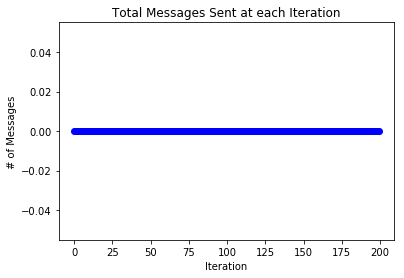

In [5]:
msg_clean = [x[:] for x in [[0] * 200] * 2]

for i in range(0,2):
    for j in range(0,200):
        msg_clean[i][j] = msg_data[j][i]

plt.plot(msg_clean[1],'bo')
plt.title("Total Messages Sent at each Iteration")
plt.xlabel("Iteration")
plt.ylabel("# of Messages")
plt.show()

In [52]:
with open("Log-cluster_readings_CL_ON.txt") as f:
    creadings = f.readlines()

bt_count = 0
svr_count = 0
bt_bytes = 0
svr_bytes = 0
for i in range(0,len(creadings)):
    creadings[i] = creadings[i].split('-')
    creadings[i][6] = (creadings[i][6].split('\n'))[0]
    if(creadings[i][3]=='BT'):
        bt_count = bt_count + 1
        bt_bytes = bt_bytes + int(creadings[i][6])
    else:
        if(creadings[i][3]=='Server'):
            svr_count = svr_count + 1
            svr_bytes = svr_bytes + int(creadings[i][6])
            
            
print(bt_count)
bt_cl_data = (bt_count,bt_bytes)
svr_cl_data = (svr_count,svr_bytes)
svr_cl_bytes = svr_bytes
svr_cl_count = svr_count

with open("Log-cluster_readings_CL_OFF.txt") as f:
    readings = f.readlines()



print(readings[0])
bt_count = 0
svr_count = 0
bt_bytes = 0
svr_bytes = 0
for i in range(0,len(readings)):
    readings[i] = readings[i].split('-')
    readings[i][6] = (readings[i][6].split('\n'))[0]
    if(readings[i][3]=='BT'):
        bt_count = bt_count + 1
        bt_bytes = bt_bytes + int(readings[i][6])
    else:
        if(readings[i][3]=='Server'):
            svr_count = svr_count + 1
            svr_bytes = svr_bytes + int(readings[i][6])
            
print(bt_count)
bt_data = (bt_count,bt_bytes)
svr_data = (svr_count,svr_bytes)

svr_bytes_comp = (svr_cl_bytes,svr_bytes) 
svr_count_comp = (svr_cl_count,svr_count) 

75889
4-0-63-Server-2-4-6

0


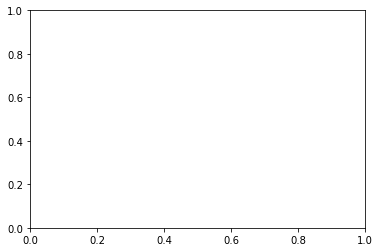

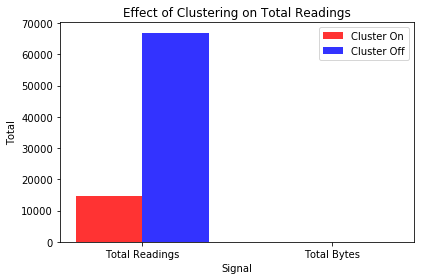

In [56]:
groups = 2
fig, ax = plt.subplots()
index = np.arange(groups)
bar_width = 0.35
opacity = 0.8
bar1 = plt.bar(index, (svr_count_comp[0],0), bar_width, alpha=opacity, color='r', label="Cluster On")
bar2 = plt.bar(index+bar_width, (svr_count_comp[1],0), bar_width, alpha=opacity, color='b', label="Cluster Off")

plt.xlabel('Signal')
plt.ylabel('Total')
plt.title('Effect of Clustering on Total Readings')
plt.xticks(index + bar_width/2, ('Total Readings', 'Total Bytes'))
plt.legend()

plt.tight_layout()
plt.show()

In [72]:
node_av_data_CON = [x[:] for x in [["0"] * 2] * 200]
with open("Log-nodes_alive_valid_CL_ON.txt") as f:
    raw_av_data_CON = f.readlines()
    
for i in range(0,200):
    node_av_data_CON[i] = raw_av_data_CON[i].split(',')
    node_av_data_CON[i][1] = (node_av_data_CON[i][1].split("\n"))[0]
    node_av_data_CON[i][0] = float((node_av_data_CON[i][0].split(":"))[1])
    node_av_data_CON[i][1] = float((node_av_data_CON[i][1].split(":"))[1])
    
node_av_data_COFF = [x[:] for x in [["0"] * 2] * 200]
with open("Log-nodes_alive_valid_CL_OFF.txt") as f:
    raw_av_data_COFF = f.readlines()
    
for i in range(0,200):
    node_av_data_COFF[i] = raw_av_data_COFF[i].split(',')
    node_av_data_COFF[i][1] = (node_av_data_COFF[i][1].split("\n"))[0]
    node_av_data_COFF[i][0] = float((node_av_data_COFF[i][0].split(":"))[1])
    node_av_data_COFF[i][1] = float((node_av_data_COFF[i][1].split(":"))[1])

In [73]:
percent_alive_CON = [0.0]*200
percent_alive_COFF = [0.0]*200
for i in range(0,200):
    try:
        percent_alive_CON[i] = (node_av_data_CON[i][1]/node_av_data_CON[i][0])*100
    except ZeroDivisionError:
        percent_alive_CON[i] = 1
    try:
        percent_alive_COFF[i] = (node_av_data_COFF[i][1]/node_av_data_COFF[i][0])*100
    except ZeroDivisionError:
        percent_alive_COFF[i] = 1

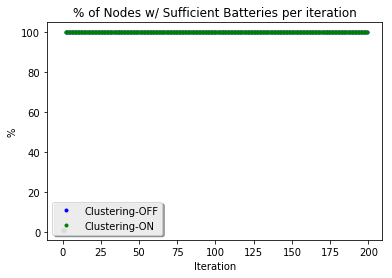

In [76]:
fig,ax = plt.subplots()
ax.plot(percent_alive_COFF,'b.',label="Clustering-OFF")
ax.plot(percent_alive_CON,'g.',label="Clustering-ON")
plt.title("% of Nodes w/ Sufficient Batteries per iteration")
plt.xlabel("Iteration")
plt.ylabel("%")
legend = ax.legend(loc='lower left', shadow=True)
plt.show()